## Importing the libreris


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Importing the CSV Data as pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### Data check to Perform  
    check Missing Values
    check Duplicates
    check data type
    check the number of unique values of each column
    check statistics of the data set
    check various categories present in the different categorical colun

In [7]:
## Check Missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
## check Duplicates
df.duplicated().sum()

0

In [9]:
## check the Null and Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
## checking the number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
## check statistic of data set
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
## Exploring Data
print("Categories in 'gender' variable :  ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethenicity' variable :  ",end=" " )
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable :   ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variables :   ",end=" "   )
print(df['lunch'].unique())

print("Categories in 'test prepration course' variable :  ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable :   ['female' 'male']
Categories in 'race/ethenicity' variable :   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variables :    ['standard' 'free/reduced']
Categories in 'test prepration course' variable :   ['none' 'completed']


In [15]:
## defining numerical and categorical column
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical featuer : {}".format(len(numeric_feature),numeric_feature))
print("\n We have {} categorical feature : {}".format(len(categorical_feature),categorical_feature))

We have 3 numerical featuer : ['math score', 'reading score', 'writing score']

 We have 5 categorical feature : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [17]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### Adding column for "Total Score" and "Average"

In [18]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f"Number of student with full mark in maths : {math_full}")
print(f"Number of student with full mark in writing : {writing_full}")
print(f"Numebr of student with full maek in reading : {reading_full}")

Number of student with full mark in maths : 7
Number of student with full mark in writing : 14
Numebr of student with full maek in reading : 17


In [22]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f"Number of student with less then 20 maek in Math : {math_less_20}")
print(f"Number of student with less then 20 maek in Writing : {writing_less_20}")
print(f"Number of student with less then 20 maek in Reading : {reading_less_20}")


Number of student with less then 20 maek in Math : 4
Number of student with less then 20 maek in Writing : 3
Number of student with less then 20 maek in Reading : 1


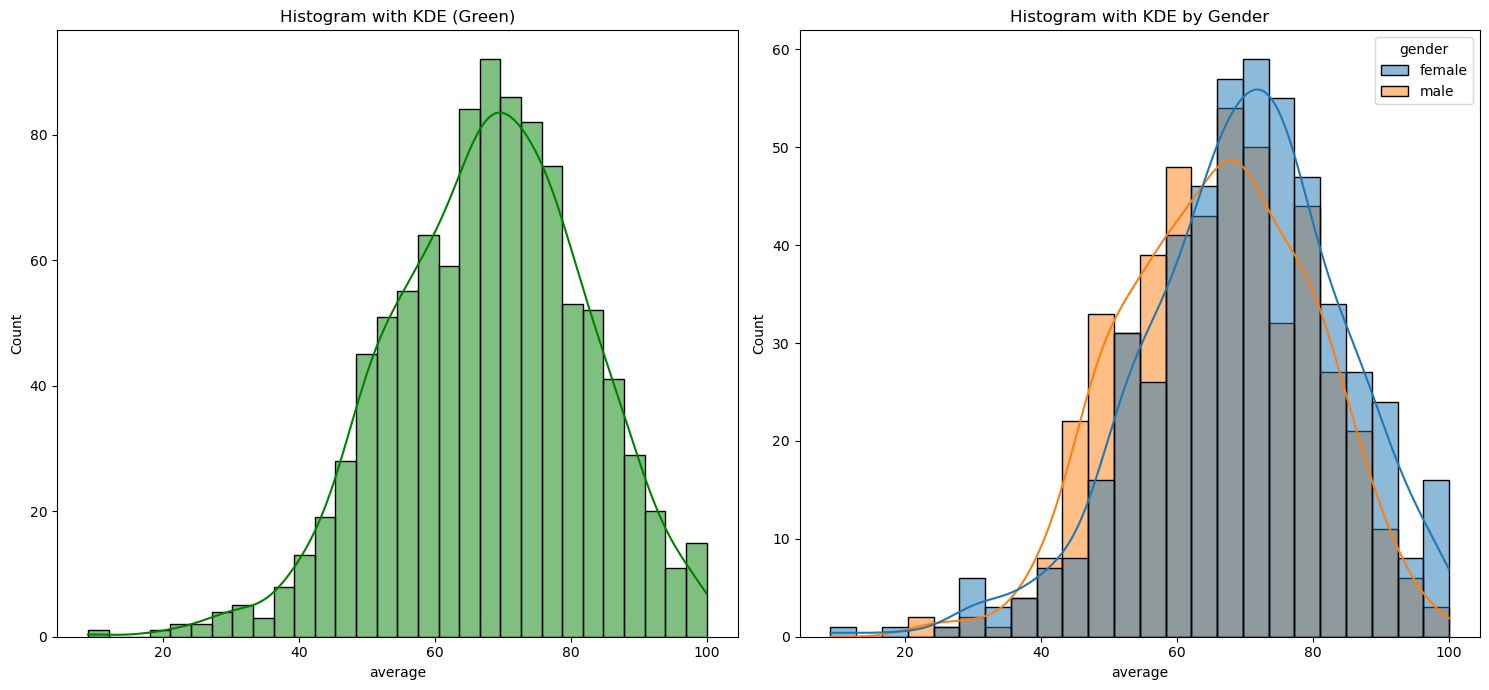

In [24]:
# Histogram and KDE plots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # note the 's' in subplots

# First plot: histogram + KDE
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Histogram with KDE (Green)')

# Second plot: histogram + KDE by gender
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Histogram with KDE by Gender')

plt.tight_layout()
plt.show()

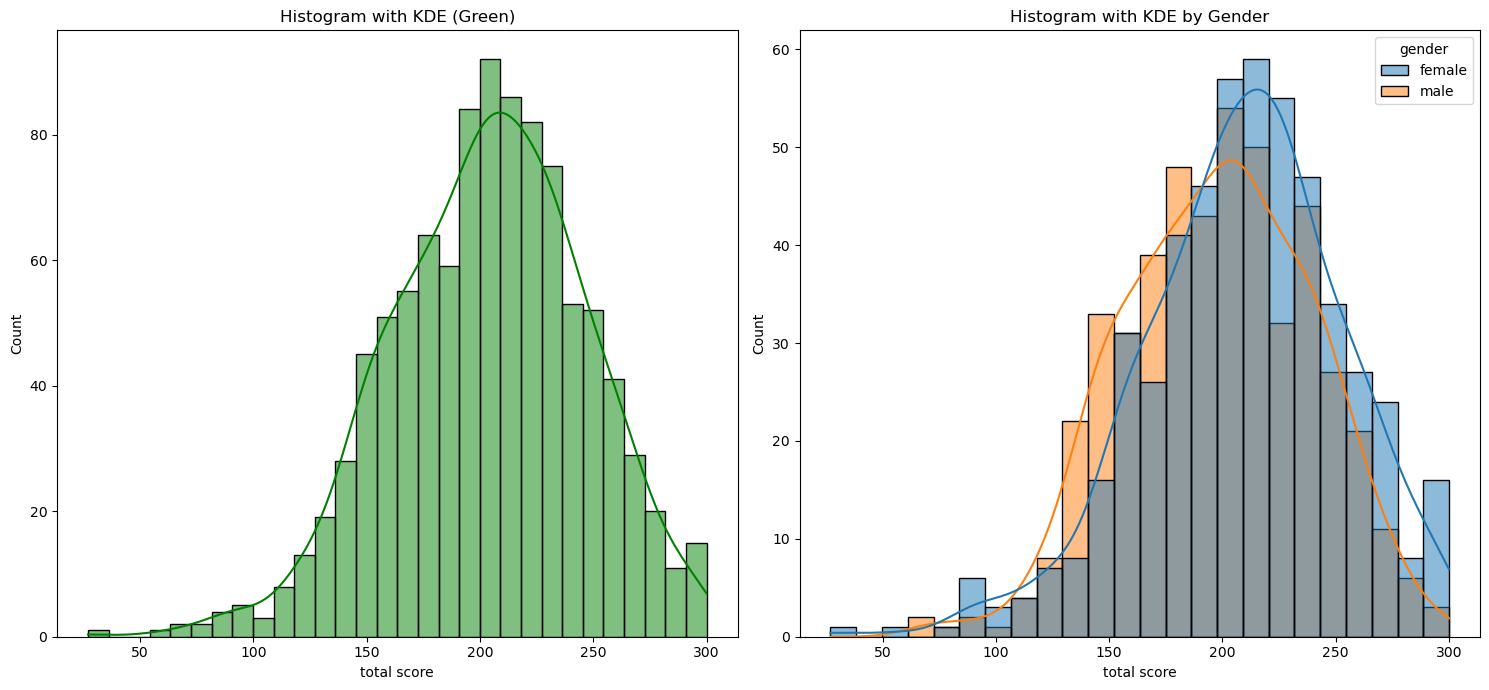

In [25]:
# Histogram and KDE plots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # note the 's' in subplots

# First plot: histogram + KDE
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Histogram with KDE (Green)')

# Second plot: histogram + KDE by gender
sns.histplot(data=df, x='total score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Histogram with KDE by Gender')

plt.tight_layout()
plt.show()

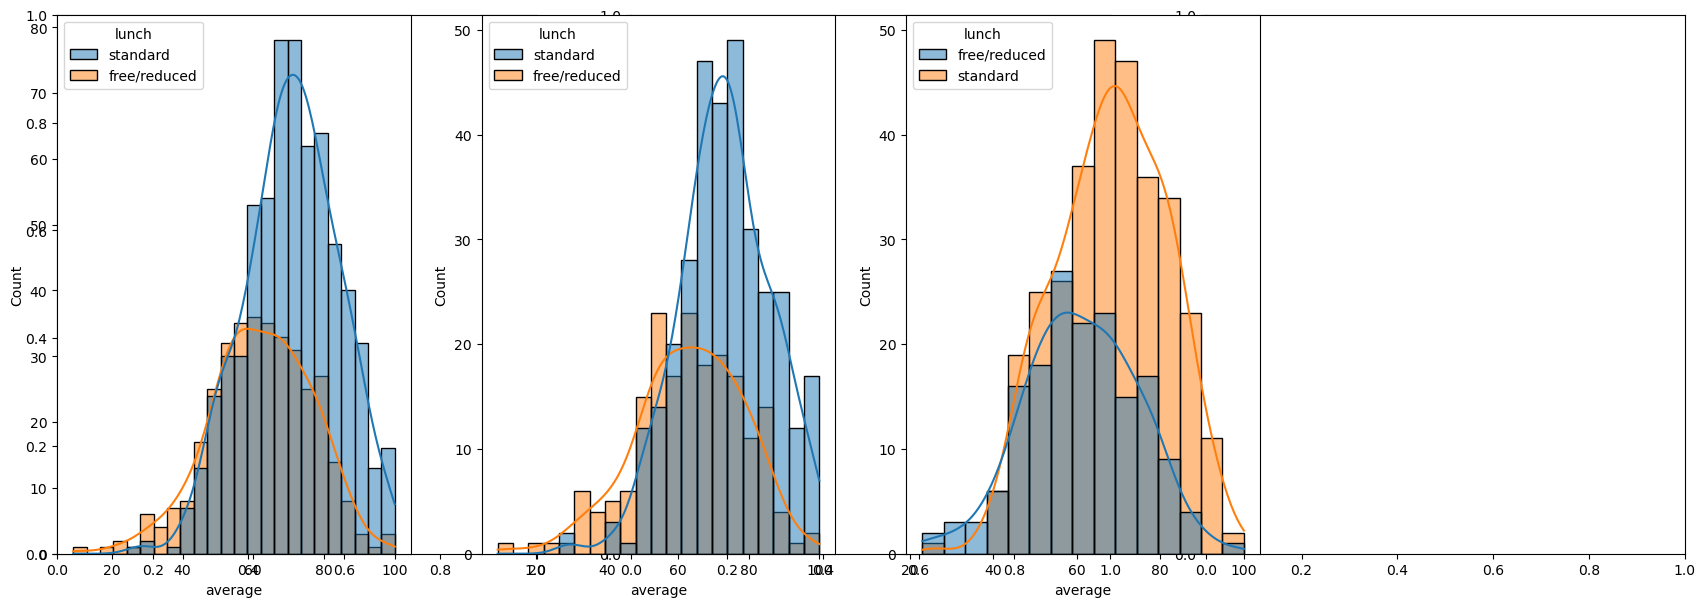

In [30]:
## female student tend to perform well then male student
plt.subplots(1,3,figsize=(21,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

In [31]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


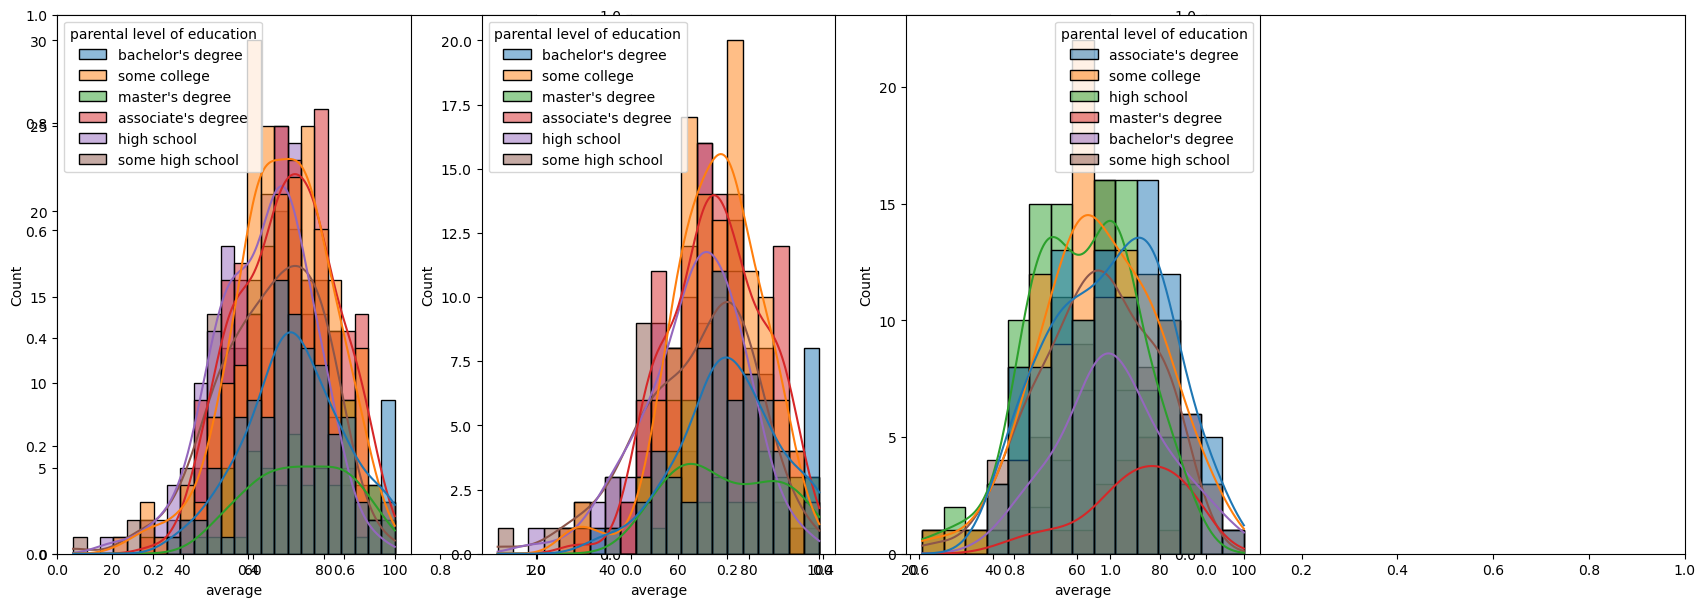

In [32]:
## female student tend to perform well then male student
plt.subplots(1,3,figsize=(21,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

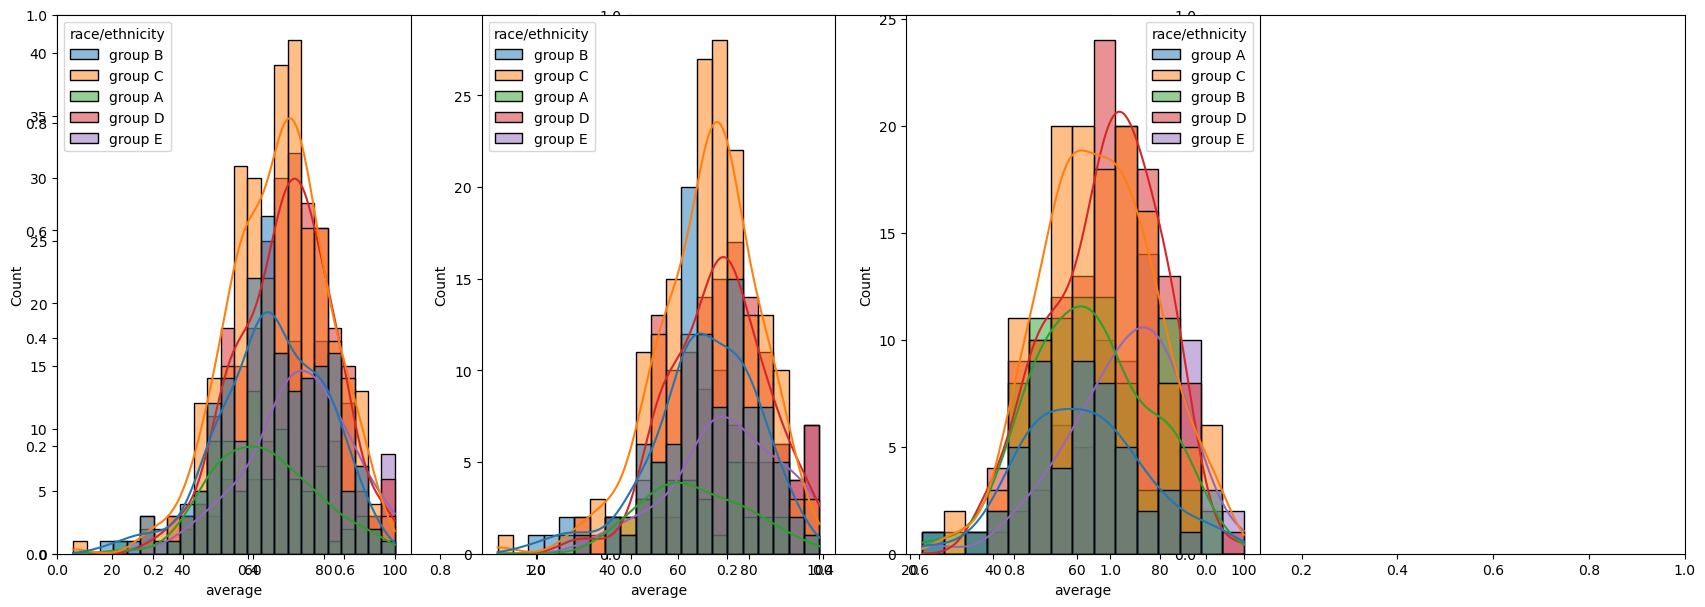

In [34]:
## female student tend to perform well then male student
plt.subplots(1,3,figsize=(21,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()